In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
hd = pd.read_csv('heart.csv')

In [3]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
hd.shape

(303, 14)

In [6]:
hd.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


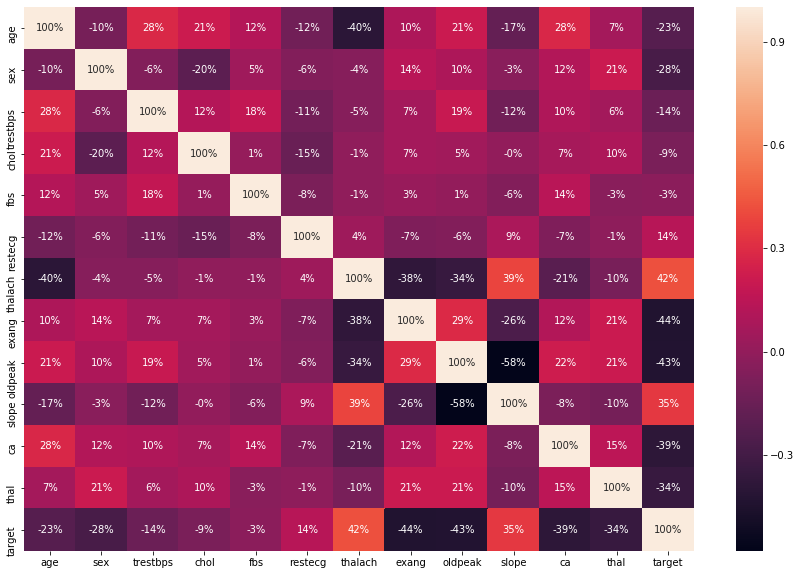

In [36]:
#visualize the correlation
plt.figure(figsize=(15,10))
sns.heatmap(hd.iloc[:,0:15].corr(), annot=True,fmt=".0%")
plt.show()


In [7]:
hd.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

In [75]:
hd.dtypes

age             int64
sex            object
cp             object
trestbps        int64
chol            int64
fbs             int64
restecg         int64
thalach         int64
exang           int64
oldpeak       float64
slope           int64
ca              int64
thal            int64
target          int64
age_group    category
dtype: object

In [82]:
hd.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,63,1,2,145,233,1,0,150,0,2.3,0,0,1,1,Senior
1,37,1,1,130,250,0,1,187,0,3.5,0,0,2,1,Young Adult
2,41,0,0,130,204,0,0,172,0,1.4,2,0,2,1,Young Adult
3,56,1,0,120,236,0,1,178,0,0.8,2,0,2,1,Adult
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Adult


In [28]:
hd.target.value_counts()


1    165
0    138
Name: target, dtype: int64

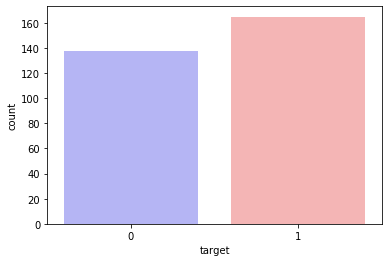

In [29]:
sns.countplot(x="target", data=hd, palette="bwr")
plt.show()


In [30]:
countNoDisease = len(hd[hd.target == 0])
countHaveDisease = len(hd[hd.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(hd.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(hd.target))*100)))


Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


Text(0.5, 1.0, 'Frequency')

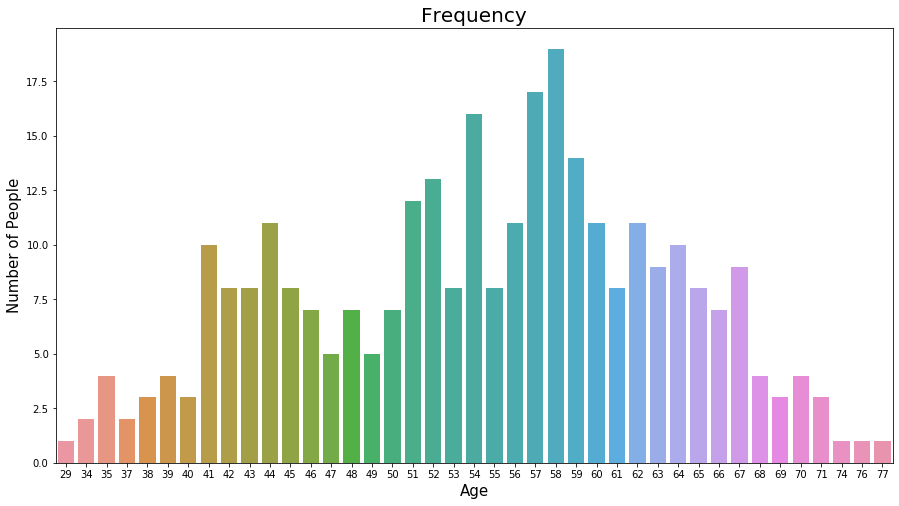

In [8]:
plt.figure(figsize = (15,8))
sns.countplot(hd['age'])
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Number of People', fontsize = 15)
plt.title('Frequency', fontsize = 20)


Text(0.5, 1.0, 'Histogram')

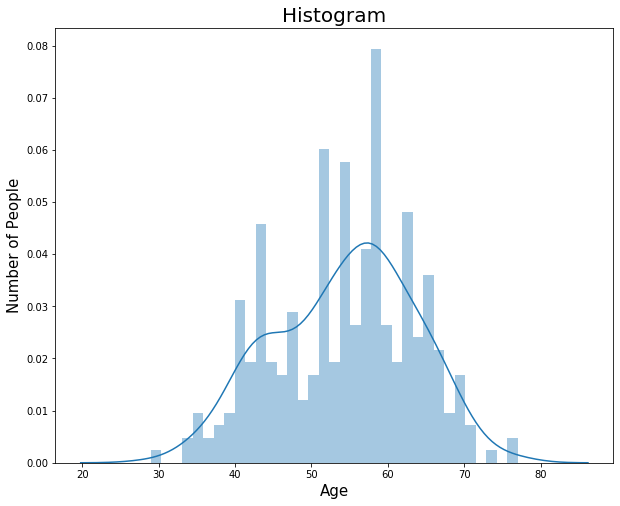

In [9]:
#Plotting the Distribution of Age. 
#Histogram
plt.figure(figsize = (10,8))
sns.distplot(hd['age'], bins = 35, kde = True)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Number of People', fontsize = 15)
plt.title('Histogram', fontsize = 20)


Text(0.5, 1.0, 'Frequency')

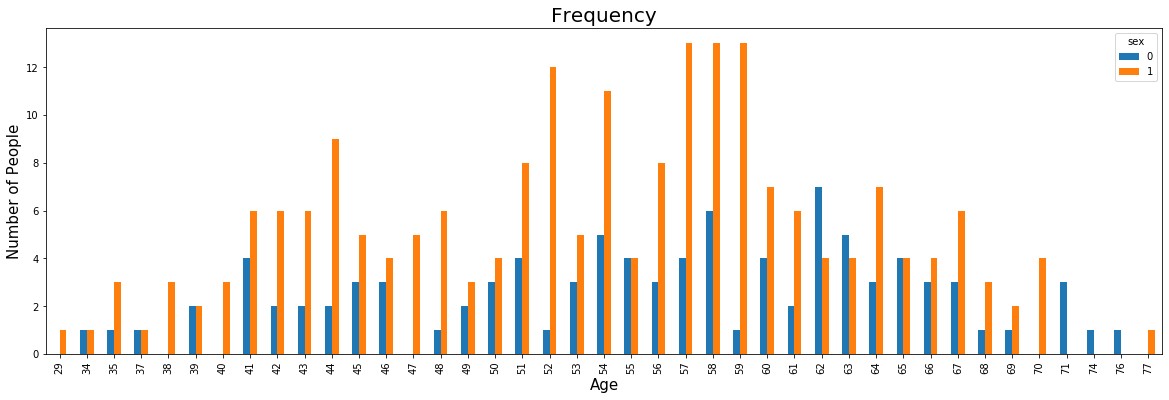

In [10]:
#lets crosstabs for age and gender.
pd.crosstab(hd.age,hd.sex).plot(kind='bar',figsize=(20,6))
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Number of People', fontsize = 15)
plt.title('Frequency', fontsize = 20)


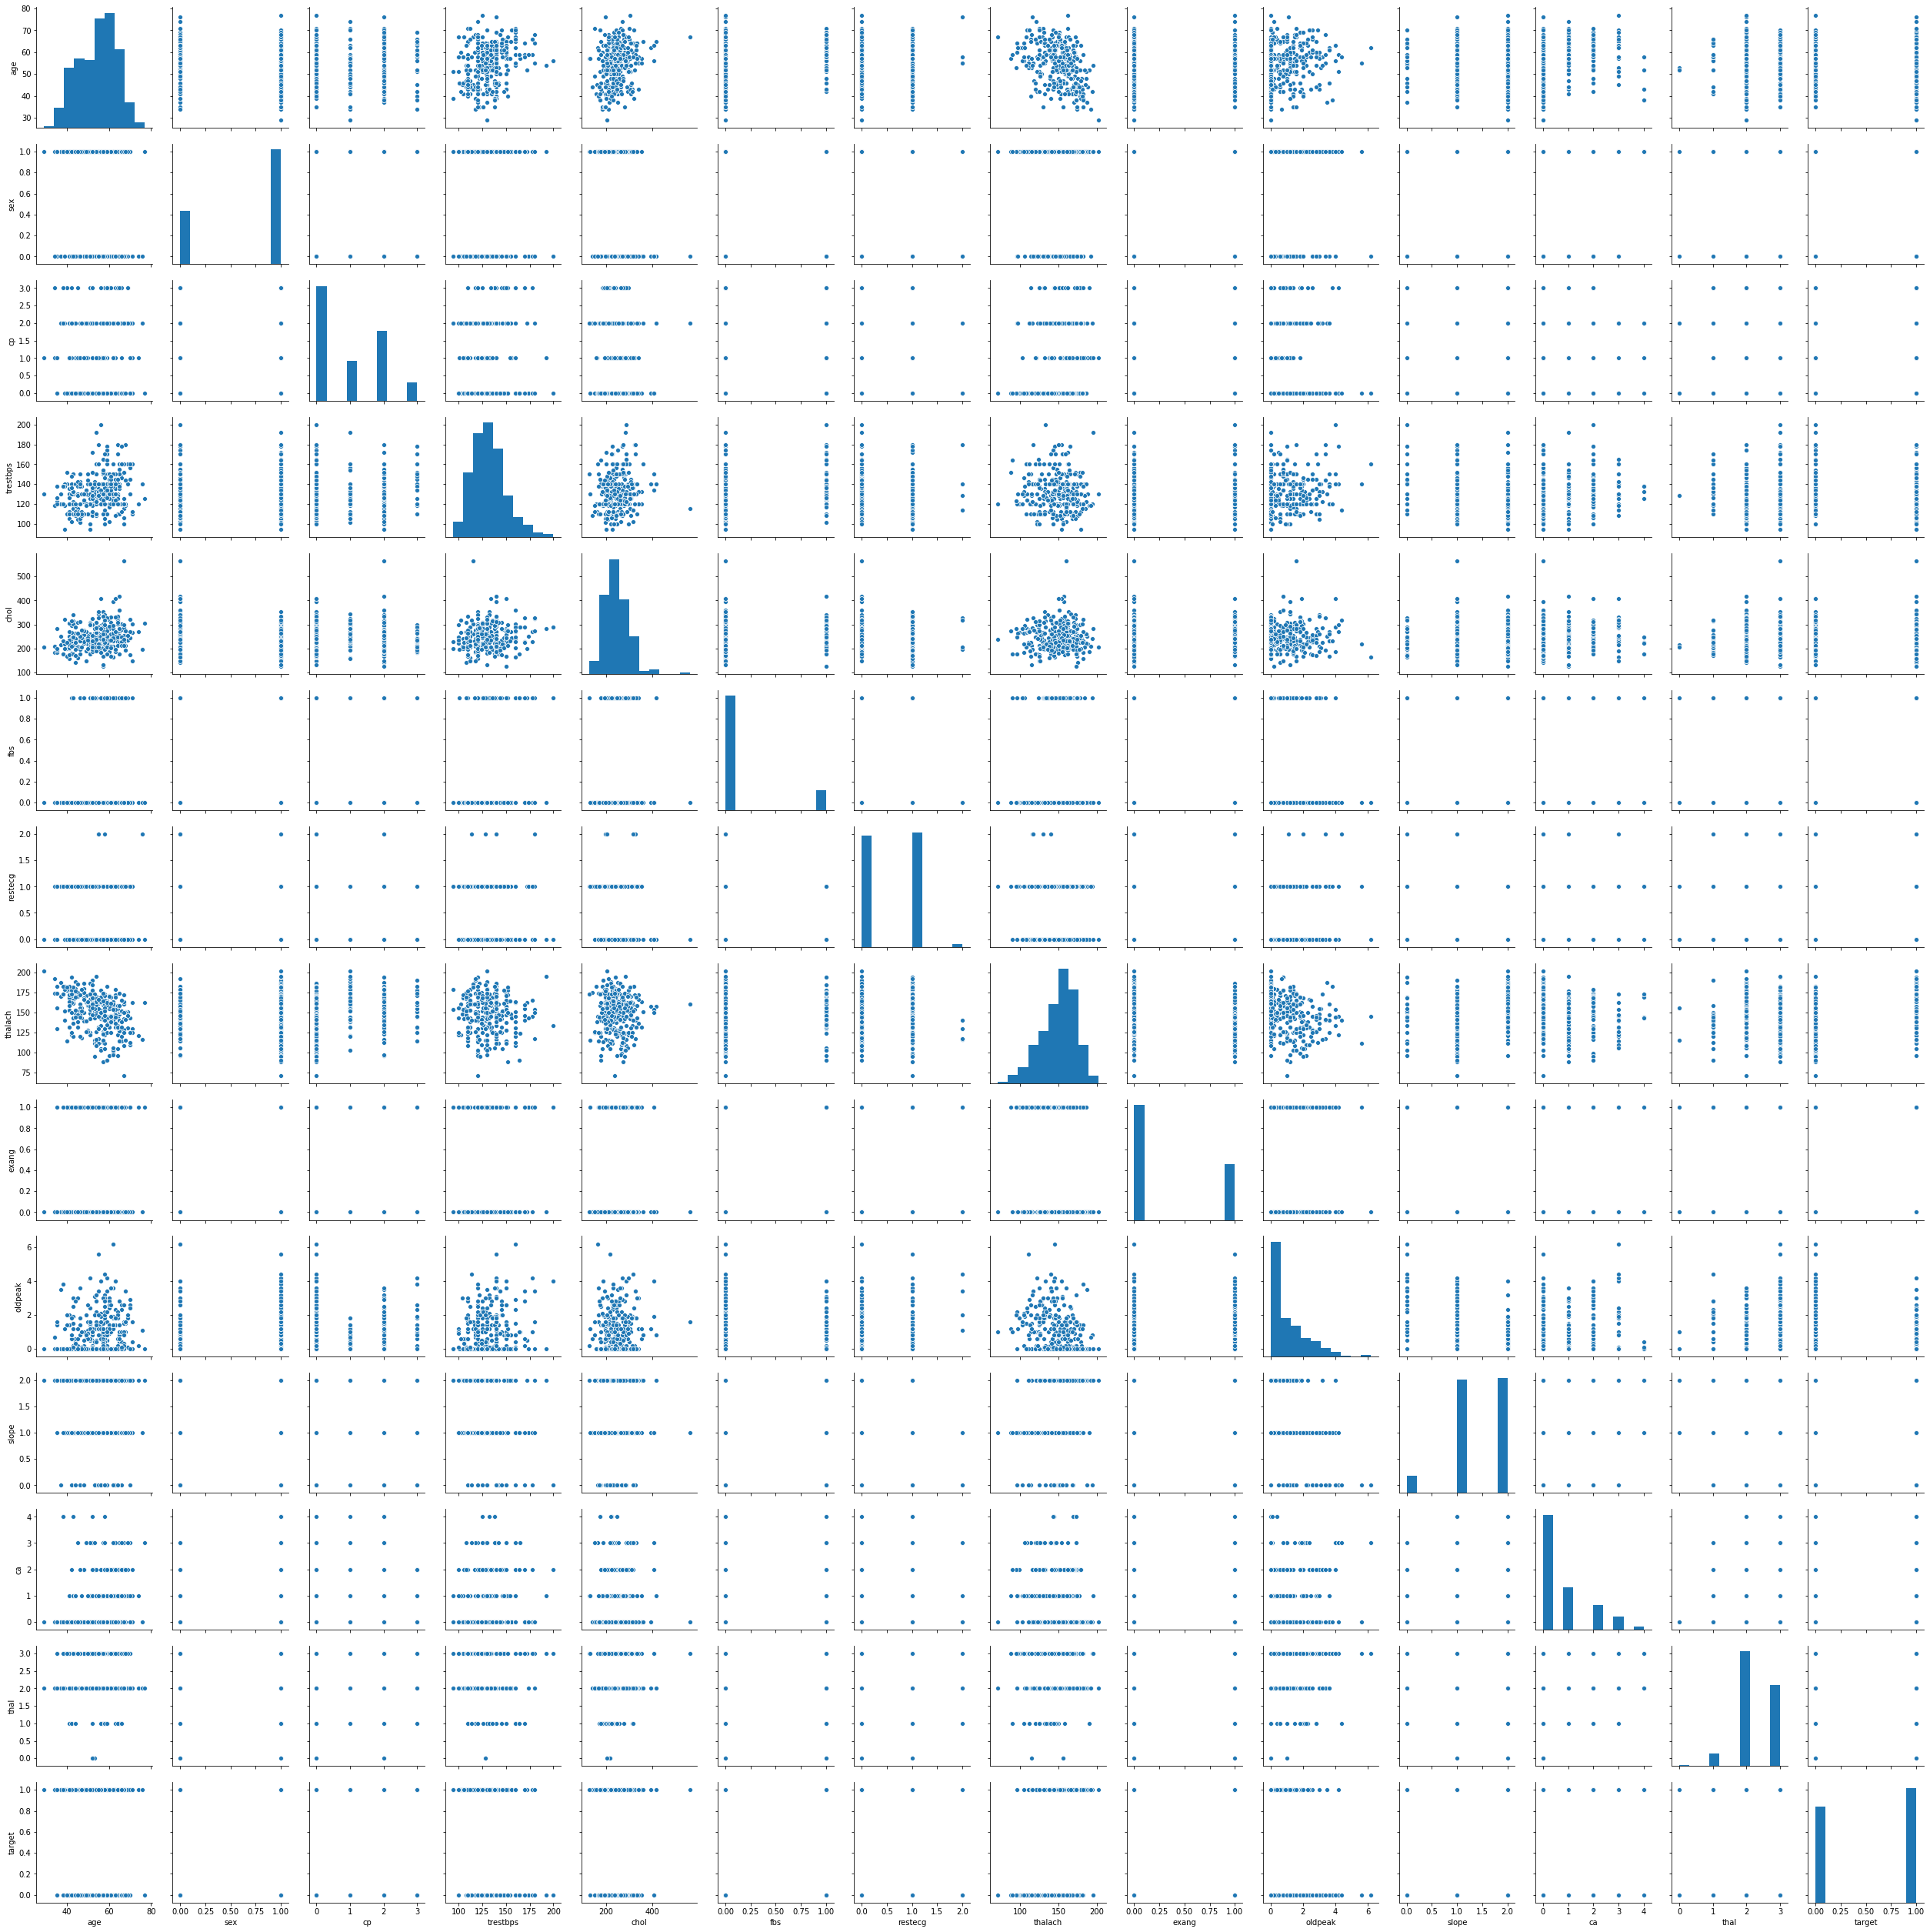

In [11]:
sns.pairplot(hd);


In [12]:
hd.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
# correlation found between age & testbps , age & chol, chol & testbps, testbps & thalach, thalach & chol,thalach & age, age & old peak, old peak & testbps, old peak & chol,

In [14]:
hd['age']=hd['age']
bins=[29,47,55,61,77]
labels=["Young Adult","Early Adult","Adult","Senior"]
hd['age_group']=pd.cut(hd['age'],bins,labels=labels)
hd.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Senior
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Young Adult
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Young Adult
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Adult
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Adult


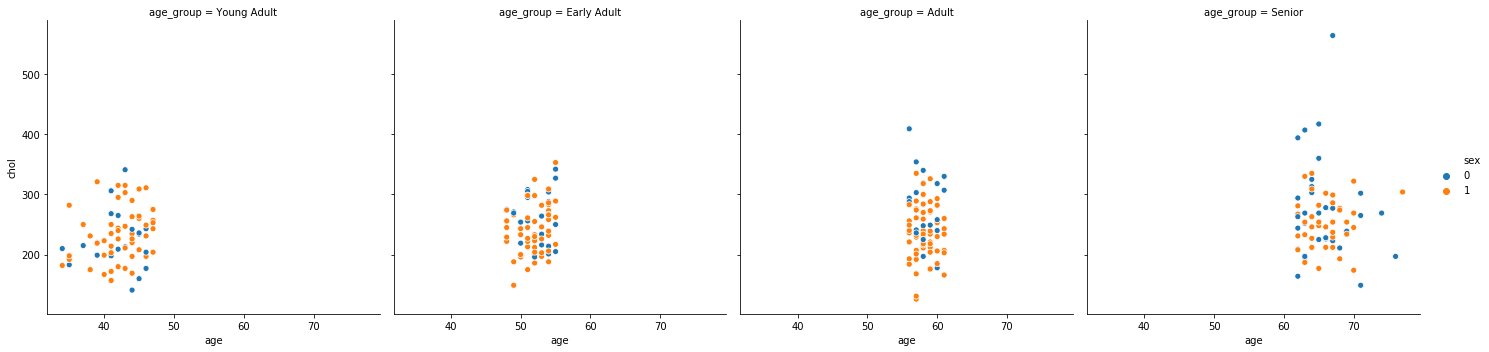

In [15]:
sns.relplot(x="age", y="chol", hue="sex",
            col="age_group", data=hd);


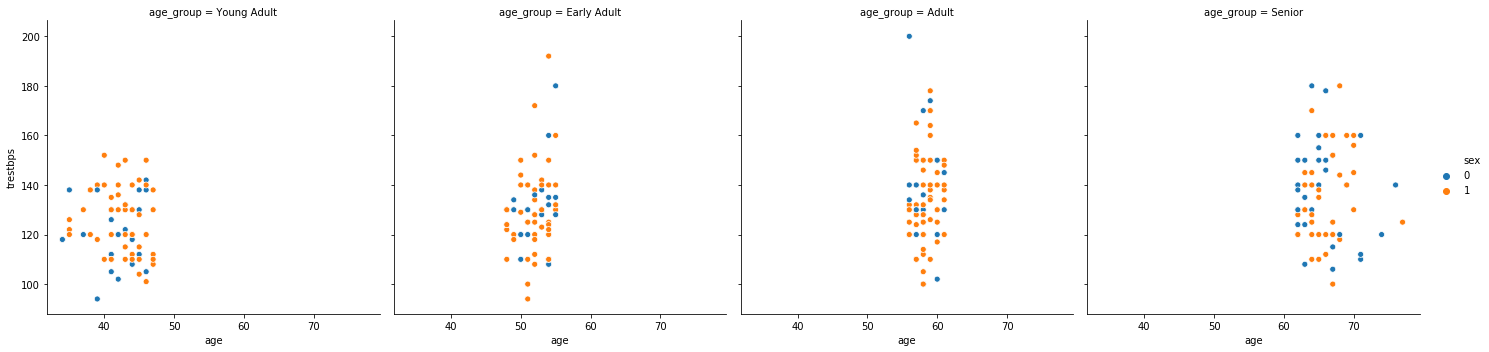

In [16]:
sns.relplot(x="age", y="trestbps", hue="sex",
            col="age_group", data=hd);


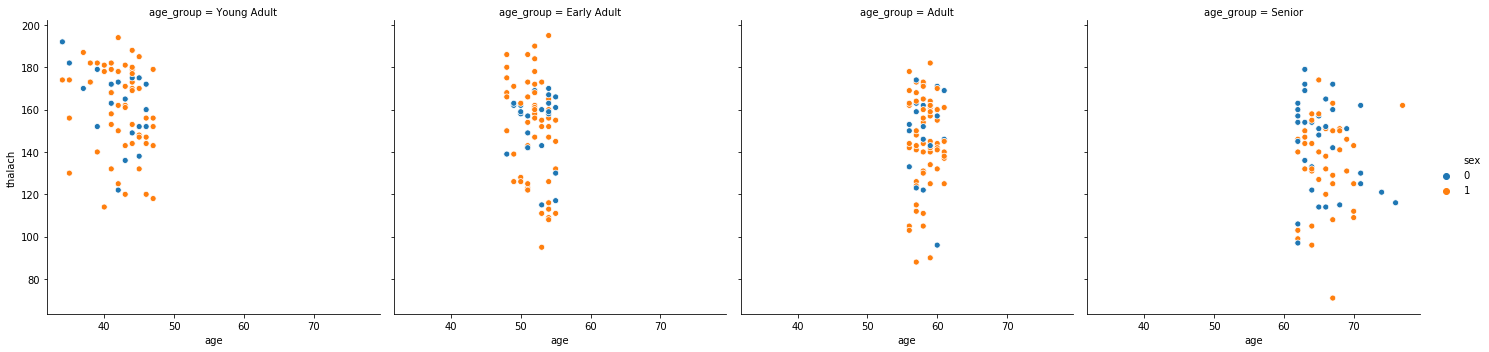

In [17]:
sns.relplot(x="age", y="thalach", hue="sex",
            col="age_group", data=hd);


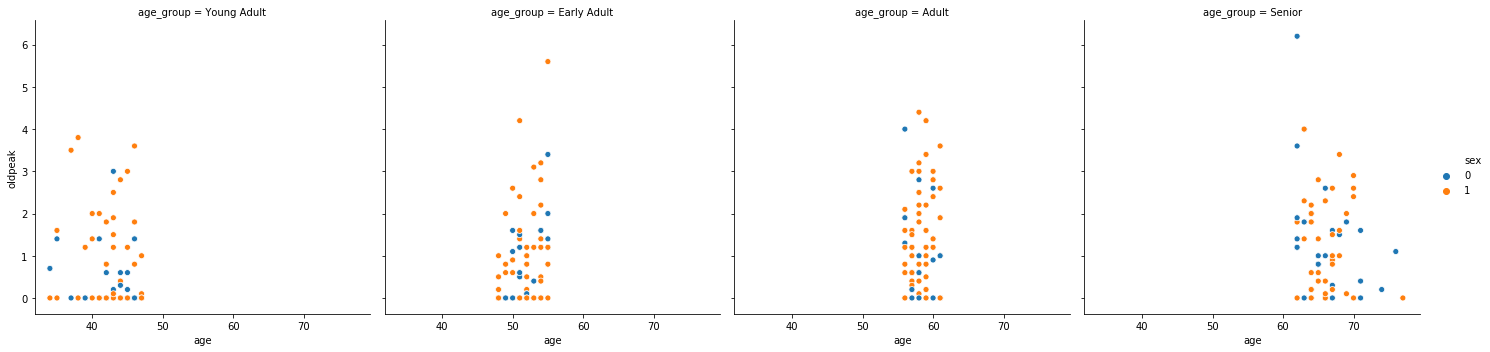

In [18]:
sns.relplot(x="age", y="oldpeak", hue="sex",
            col="age_group", data=hd);


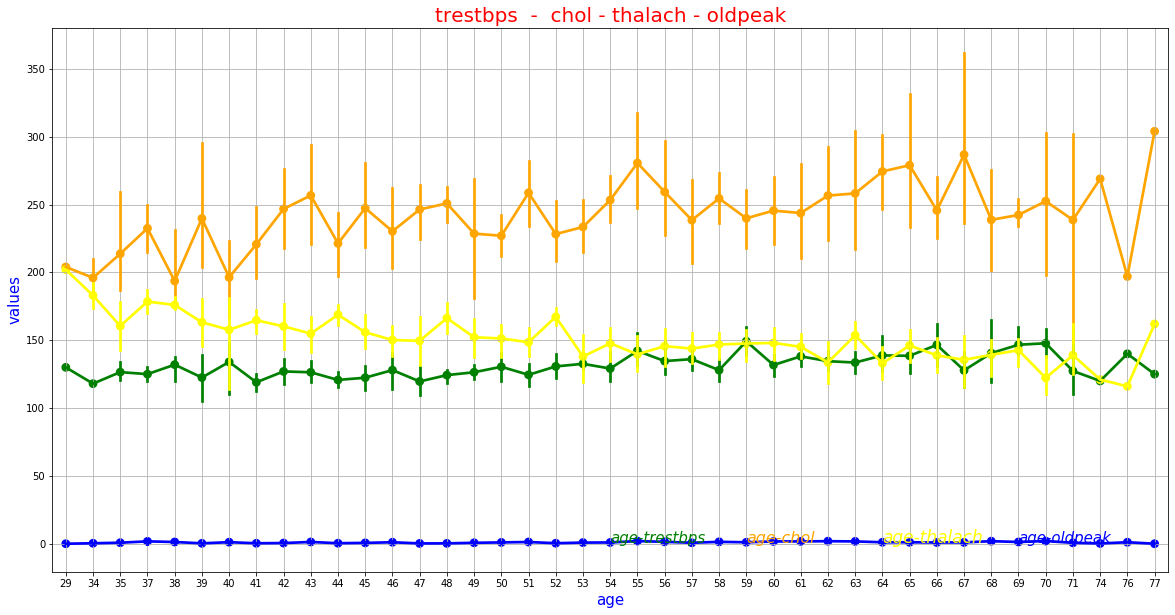

In [19]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='age',y='trestbps',data=hd,color='green',alpha=0.4)
sns.pointplot(x='age',y='chol',data=hd,color='orange',alpha=0.4)
sns.pointplot(x='age',y='thalach',data=hd,color='yellow',alpha=0.4)
sns.pointplot(x='age',y='oldpeak',data=hd,color='blue',alpha=0.4)
plt.text(20,0.4,'age-trestbps',color='green',fontsize = 15,style = 'italic')
plt.text(25,0.5,'age-chol',color='orange',fontsize = 16,style = 'italic')
plt.text(30,0.6,'age-thalach',color='yellow',fontsize = 17,style = 'italic')
plt.text(35,0.4,'age-oldpeak',color='blue',fontsize = 15,style = 'italic')

plt.xlabel('age',fontsize = 15,color='blue')
plt.ylabel('values',fontsize = 15,color='blue')
plt.title('trestbps  -  chol - thalach - oldpeak',fontsize = 20,color='red')
plt.grid()


Text(0.5, 1.0, 'Percentage of people as per chest pain type')

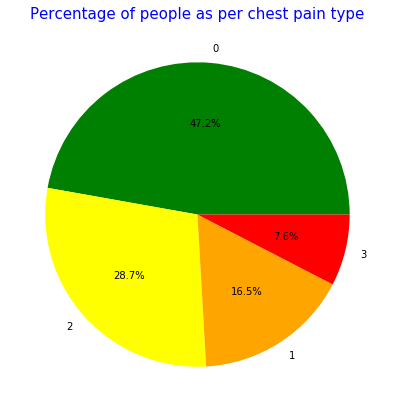

In [20]:
hd.cp.dropna(inplace = True)
labels = hd.cp.value_counts().index
colors = ['green','yellow','orange','red']
explode = [0,0,0,0]
sizes = hd.cp.value_counts().values
plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Percentage of people as per chest pain type',color = 'blue',fontsize = 15)

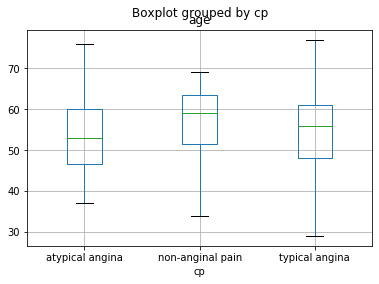

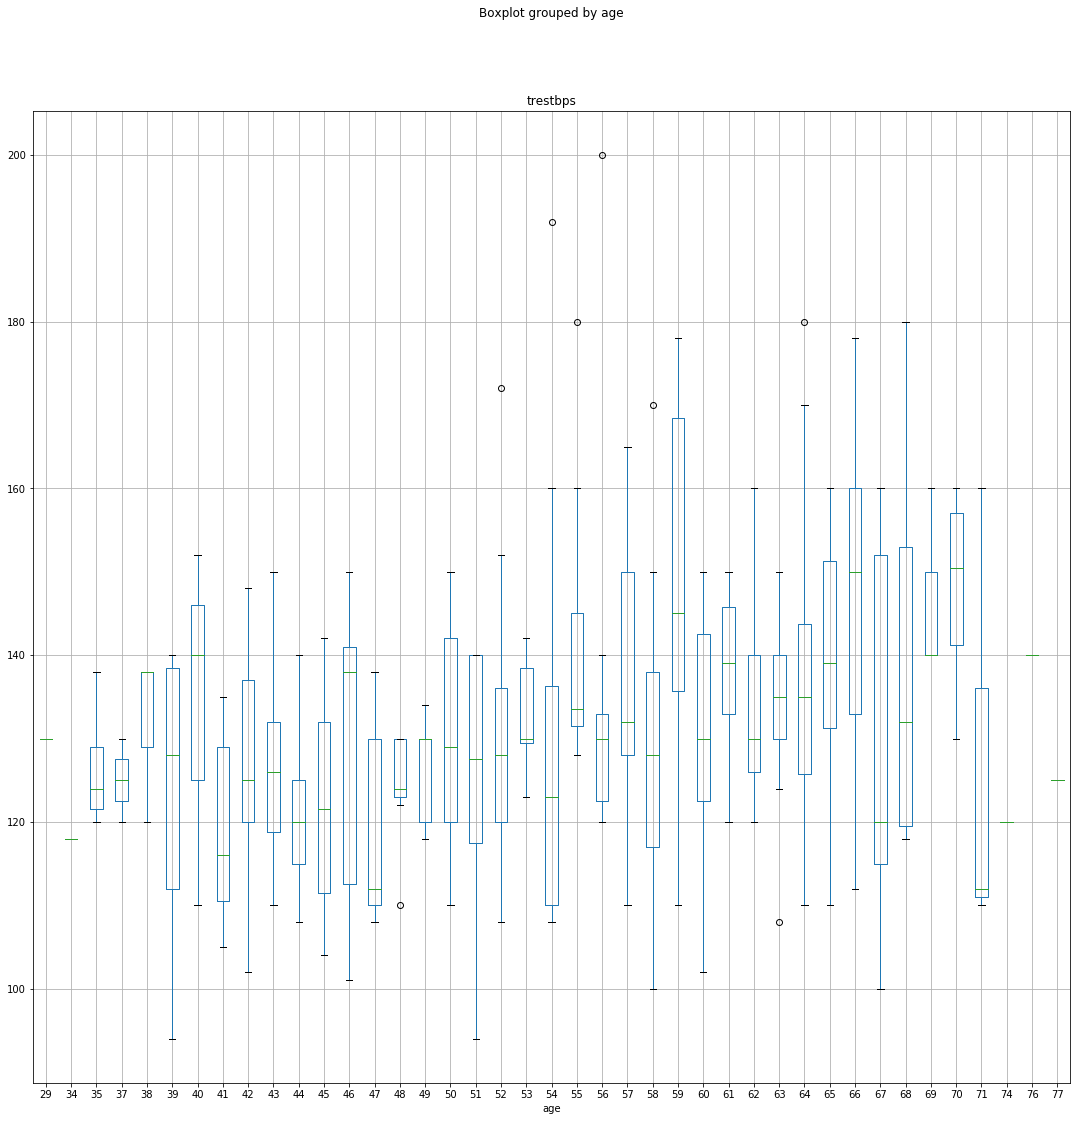

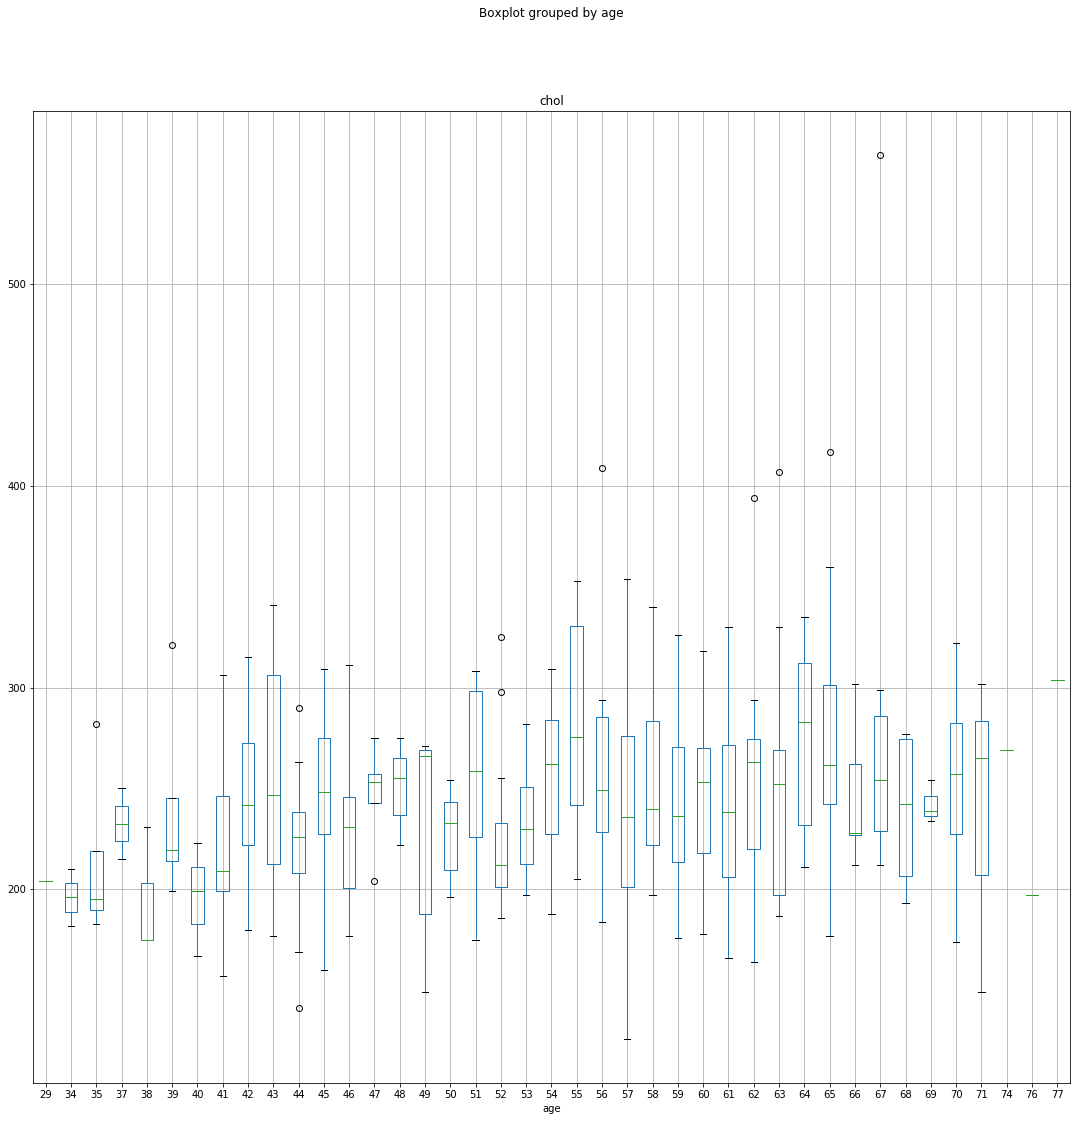

In [47]:
#checking for outliers
hd.boxplot(column='age',by='cp')
plt.show()
#boxplot between age and trestbps
hd.boxplot(column='trestbps',by='age', figsize=(18,18))
plt.show()

#boxplot between age and chol
hd.boxplot(column='chol',by='age', figsize=(18,18))
plt.show()



In [54]:
highchol = hd[hd.chol>500]
highchol


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
85,67,Female,atypical angina,115,564,0,0,160,0,1.6,1,0,3,1,Senior


In [61]:
hd.drop(hd.index[85])


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,63,Male,non-anginal pain,145,233,1,0,150,0,2.3,0,0,1,1,Senior
1,37,Male,atypical angina,130,250,0,1,187,0,3.5,0,0,2,1,Young Adult
2,41,Female,typical angina,130,204,0,0,172,0,1.4,2,0,2,1,Young Adult
3,56,Male,typical angina,120,236,0,1,178,0,0.8,2,0,2,1,Adult
4,57,Female,typical angina,120,354,0,1,163,1,0.6,2,0,2,1,Adult
5,57,Male,typical angina,140,192,0,1,148,0,0.4,1,0,1,1,Adult
6,56,Female,typical angina,140,294,0,0,153,0,1.3,1,0,2,1,Adult
7,44,Male,typical angina,120,263,0,1,173,0,0.0,2,0,3,1,Young Adult
8,52,Male,atypical angina,172,199,1,1,162,0,0.5,2,0,3,1,Early Adult
9,57,Male,atypical angina,150,168,0,1,174,0,1.6,2,0,2,1,Adult


In [22]:
youngadult_chol=hd[(hd.chol>246) & (hd.trestbps>131) & ((hd.sex==0)|(hd.sex==1)) & (hd.age_group=="Young Adult") & (hd.cp>1)]
youngadult_chol



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1,Young Adult
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2,1,Young Adult


In [23]:
Earlyadult_chol=hd[(hd.chol>246) & (hd.trestbps>131) & ((hd.sex==0)|(hd.sex==1)) & (hd.age_group=="Early Adult") & (hd.cp>1)]
Earlyadult_chol

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1,Early Adult
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1,Early Adult
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1,Early Adult


In [24]:
adult_chol=hd[(hd.chol>246) & (hd.trestbps>131) & ((hd.sex==0)|(hd.sex==1)) & (hd.age_group=="Adult") & (hd.cp>1)]
adult_chol

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1,Adult
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1,Adult
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0,Adult
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,Adult


In [25]:
senior_chol=hd[(hd.chol>246) & (hd.trestbps>131) & ((hd.sex==0)|(hd.sex==1)) & (hd.age_group=="Senior") & (hd.cp>1)]
senior_chol

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1,Senior
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2,1,Senior
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1,Senior
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2,1,Senior
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3,1,Senior
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2,1,Senior
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1,Senior
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2,0,Senior
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0,Senior
222,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0,Senior


In [26]:
overallpeople=hd[(hd.chol>246) & (hd.trestbps>131) & ((hd.sex==0)|(hd.sex==1)) & (hd.cp>1)]
overallpeople

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1,Adult
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1,Senior
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1,Early Adult
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2,1,Senior
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1,Senior
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1,Early Adult
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1,Young Adult
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2,1,Young Adult
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2,1,Senior
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1,Early Adult


In [89]:
hd1 = hd.drop('age_group',axis =1)
hd1.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,2,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,1,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,0,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,0,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [90]:
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,63,1,2,145,233,1,0,150,0,2.3,0,0,1,1,Senior
1,37,1,1,130,250,0,1,187,0,3.5,0,0,2,1,Young Adult
2,41,0,0,130,204,0,0,172,0,1.4,2,0,2,1,Young Adult
3,56,1,0,120,236,0,1,178,0,0.8,2,0,2,1,Adult
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Adult
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,Adult
6,56,0,0,140,294,0,0,153,0,1.3,1,0,2,1,Adult
7,44,1,0,120,263,0,1,173,0,0.0,2,0,3,1,Young Adult
8,52,1,1,172,199,1,1,162,0,0.5,2,0,3,1,Early Adult
9,57,1,1,150,168,0,1,174,0,1.6,2,0,2,1,Adult


Accuracy is:  1.0


C:\Users\Admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


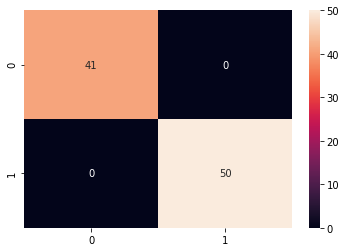

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(hd1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")


In [95]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)


Score list: [ 16.48769638   6.42647371  18.45910925   1.32140798   7.23333105
   0.27348308   0.74713309 118.64997018  31.0358109   46.52639636
   6.65722397  54.20190366   4.87725349  97.        ]
Feature list: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


Accuracy is:  1.0


C:\Users\Admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


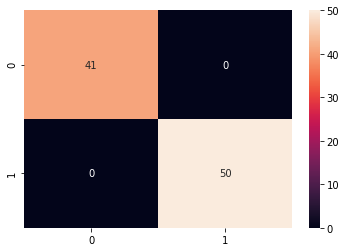

In [96]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")


In [97]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])


C:\Users\Admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: Future

Chosen best 5 feature by rfe: Index(['thalach', 'oldpeak', 'ca', 'thal', 'target'], dtype='object')


C:\Users\Admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [98]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])


C:\Users\Admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: Future

Optimal number of features : 1
Best features : Index(['target'], dtype='object')


C:\Users\Admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: Future

C:\Users\Admin\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature ranking:
1. feature 13 (0.673889)
2. feature 11 (0.058971)
3. feature 12 (0.050933)
4. feature 9 (0.040160)
5. feature 2 (0.036017)
6. feature 7 (0.028781)
7. feature 8 (0.028353)
8. feature 10 (0.027676)
9. feature 3 (0.025863)
10. feature 0 (0.013379)
11. feature 1 (0.009050)
12. feature 5 (0.003467)
13. feature 4 (0.003143)
14. feature 6 (0.000317)


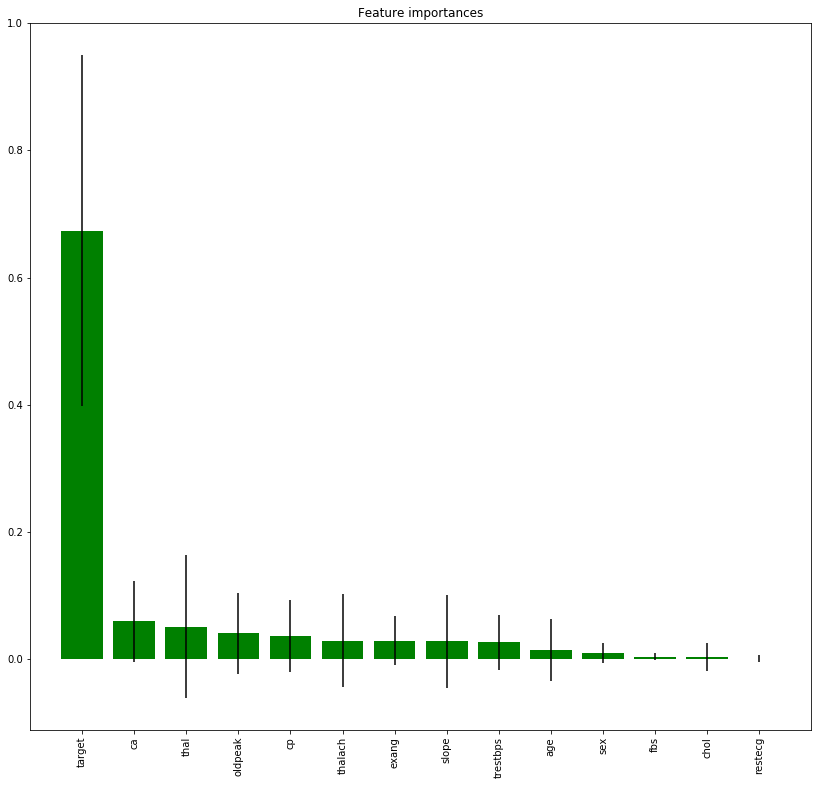

In [99]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()
